*Time series forecasting is the process of predicting future values based on previously observed values in a sequence of data points over time. In financial forecasting, time series forecasting is particularly useful for predicting stock prices, exchange rates, or sales figures, where past data influences future outcomes.*

There are several models for time series forecasting:
- ARIMA (AutoRegressive Integrated Moving Average): A commonly used model for univariate time series.
- SARIMA (Seasonal ARIMA): Useful if the data has seasonality.
- Exponential Smoothing (ETS): Another approach for forecasting.
- Prophet: A model developed by Facebook that is effective for handling seasonal data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Fetch stock data for Apple (AAPL) from Yahoo Finance
stock_data = yf.download('AAPL', start='2010-01-01', end='2024-01-01')

# Display the first few rows of the data
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price      Adj Close     Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                                   
2010-01-04  6.447411  7.643214  7.660714  7.585000  7.622500  493729600
2010-01-05  6.458559  7.656429  7.699643  7.616071  7.664286  601904800
2010-01-06  6.355829  7.534643  7.686786  7.526786  7.656429  552160000
2010-01-07  6.344078  7.520714  7.571429  7.466071  7.562500  477131200
2010-01-08  6.386255  7.570714  7.571429  7.466429  7.510714  447610800


In [3]:
# Check for missing values
print(stock_data.isnull().sum())

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64


In [4]:
# Use the adjusted close price for forecasting
stock_data = stock_data['Adj Close']
stock_data

Ticker,AAPL
Date,
2010-01-04,6.447411
2010-01-05,6.458559
2010-01-06,6.355829
2010-01-07,6.344078
2010-01-08,6.386255
...,...
2023-12-22,192.656189
2023-12-26,192.108856
2023-12-27,192.208359


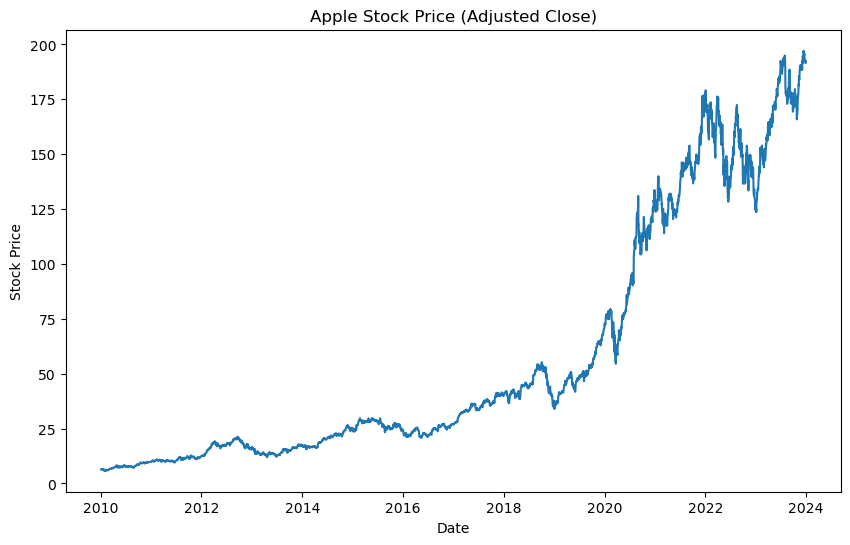

In [5]:
# Plot the stock data
plt.figure(figsize=(10, 6))
plt.plot(stock_data)
plt.title('Apple Stock Price (Adjusted Close)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [6]:
# ADF test to check for stationarity
result = adfuller(stock_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, the series is non-stationary and requires differencing


ADF Statistic: 0.9209712922617322
p-value: 0.9933579942132714


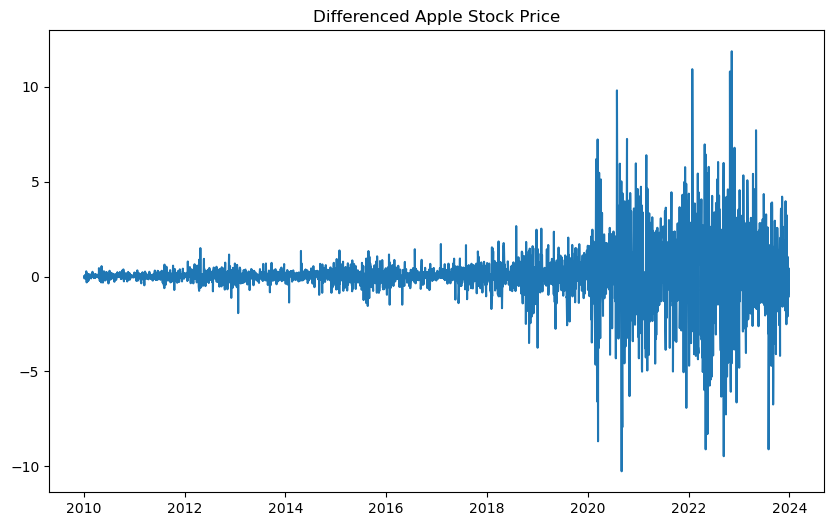

In [7]:
# Differencing the series to make it stationary
stock_data_diff = stock_data.diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(stock_data_diff)
plt.title('Differenced Apple Stock Price')
plt.show()

In [8]:
# Fit an ARIMA model
model = ARIMA(stock_data, order=(5, 1, 0))  # ARIMA(p, d, q)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 3522
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6280.462
Date:                Fri, 17 Jan 2025   AIC                          12572.924
Time:                        15:18:19   BIC                          12609.923
Sample:                             0   HQIC                         12586.125
                               - 3522                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0365      0.008     -4.398      0.000      -0.053      -0.020
ar.L2         -0.0236      0.009     -2.776      0.006      -0.040      -0.007
ar.L3         -0.0125      0.009     -1.359      0.1

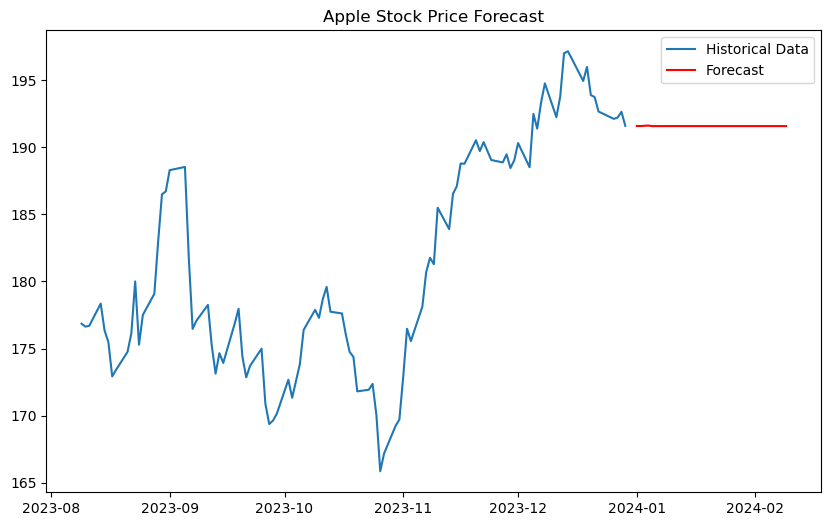

In [9]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index[-100:], stock_data[-100:], label='Historical Data')
plt.plot(pd.date_range(stock_data.index[-1], periods=31, freq='B')[1:], forecast, 
         label='Forecast', color='red')
plt.title('Apple Stock Price Forecast')
plt.legend()
plt.show()